In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, itertools
import seaborn as sns
import itertools
import scipy.stats as stats
from scipy.stats import spearmanr
import plotly.plotly as py
import plotly.graph_objs as go
plt.style.use('ggplot')

In [2]:
def variables(df, column_out):
    All = [cols for cols in df.columns if cols not in column_out]
    continuous = [cols for cols in df._get_numeric_data().columns]
    categorical = [_ for _ in All if _ not in continuous]
    return All, continuous, categorical

def Analyze_Continuous_hist(df, column):
    df[column].hist()
    print(df[column].describe())

def Analyze_Continuous_box(df, column, target=None):
    df.boxplot(column=[column], by=target)
    
def Analze_Categorical(df, column):
    train.groupby(column).size().plot(kind='bar')
    #print(train.groupby(column).size())
    print("Total Unique Classes", train[column].cat.categories)

def Analyze_plotly_2_categorical(df, column1, column2):
    data = []
    for _ in range(pd.crosstab(train[column1], train[column2]).shape[0]):
        x = sorted(train[column2].unique())
        y = (pd.crosstab(train[column1], train[column2]).iloc[_,:]) #TODO might need some fixing
        name = train[column1].unique()
        trace0 = go.Bar(x=x,
                       y=y,
                       name=name[_])
        data.append(trace0)
    layout = go.Layout(
        barmode='stack',
        title= column1 + ' Vs ' + column2
    )
    fig = go.Figure(data=data, layout=layout)
    print(pd.crosstab(train[column1], train[column2]))
    return fig
    ### Need to catch the figure and plot it

def Analyze_two_categorical(df, column1, column2):
    df_table = pd.crosstab(train[column1], train[column2])
    df_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
    
def Analyze_all_categorical(df, column_out=[]):
    All = [cols for cols in df.columns if cols not in column_out]
    continuous = [cols for cols in df._get_numeric_data().columns]
    categorical = [_ for _ in All if _ not in continuous]
    import itertools
    L = 2
    for subset in itertools.combinations(categorical, L):
        print(subset[0], subset[1])
        Analyze_two_categorical(df, subset[0], subset[1])
        
def Analyze_all_continuous_categorical(df):
    All = [cols for cols in df.columns]
    continuous = [cols for cols in df._get_numeric_data().columns]
    categorical = [_ for _ in All if _ not in continuous]
    import itertools
    L = 2
    for subset in itertools.product(continuous, categorical):
        df.boxplot(column=[subset[0]], by=subset[1])
        
def Analyze_all_continuous(df, Yname=None):
    cols = df._get_numeric_data().columns
    import itertools
    L = 2
    for subset in itertools.combinations(cols, L):
#         df[subset[0]] = np.log(1+df[subset[0]])
#         df[subset[1]] = np.log(1+df[subset[1]])
        sns.lmplot(subset[0], subset[1], data=df, hue=Yname, fit_reg=True)
        plt.show()
        
def get_color():
    import random
    return "rgb(" + str(random.randint(0, 256)) + ", " + str(random.randint(0, 256)) + ", " + str(
            random.randint(0, 256)) + ")"

def get_matplot_color():
    colors = ['red','green', 'blue', 'orange', 'black', 'yellow']
    return colors[np.random.randint(0, len(colors))]

def Analyze_null_values(df):
    labels = []
    values = []
    percentage_value = []
    print(df.apply(lambda x: sum(x.isnull()),axis=0))
    for col in df.columns:
        labels.append(col)
        values.append(df[col].isnull().sum())
        percentage_value.append(df[col].isnull().sum()/df.shape[0])
    data = [go.Bar(x=values,
                   y=labels,
                   orientation='h',
                   name='Null Values' 
                  ),
            go.Bar(x=percentage_value,
                  y=labels,
                  orientation='h',
                   name='percentage of null'
                  )
           ]
    
    layout = go.Layout(
        barmode='group',
        title='Null Values in Features'
    )
    fig = go.Figure(data=data, layout=layout)
    return fig, labels, values

def Analyze_correlation_continuous(df, column, Columns_out=[]):
    x_cols = [col for col in df._get_numeric_data().columns if col not in Columns_out + [column]]
    labels = []
    values = []
    for col in x_cols:
        labels.append(col)
        values.append(np.corrcoef(df[col].values, df[column].values)[0,1])

    ind = np.arange(len(labels))
    width = 0.5
    fig, ax = plt.subplots()
    rects = ax.barh(ind, np.array(values))
    ax.set_yticks(ind + ((width)/2.))
    ax.set_yticklabels(labels, rotation='horizontal')
    ax.set_xlabel("Correlation coefficient")
    ax.set_title("Correlation for continuous variables")
    plt.show()
    
def Analyze_correlation_categorical(df, column_out=[]):
    All = [cols for cols in df.columns if cols not in column_out]
    continuous = [cols for cols in df._get_numeric_data().columns]
    categorical = [_ for _ in All if _ not in continuous]
    L = 2
    sets = itertools.combinations(categorical, L)
    for subset in sets:
        print(subset[0] + " Vs " + subset[1] + " : {}".format(spearmanr(df[subset[0]], df[subset[1]])))
        
def Analyze_correlation_categorical_continuous(df, column_out=[]):
    All = [cols for cols in df.columns if cols not in column_out]
    continuous = [cols for cols in df._get_numeric_data().columns]
    categorical = [_ for _ in All if _ not in continuous]
    L = 2
    for subset in itertools.product(continuous, categorical):
        ##RUN ANOVA
        pass
    
def fixing_null_Values(df, column_out):
    All = [cols for cols in df.columns if cols not in column_out]
    continuous = [cols for cols in df._get_numeric_data().columns]
    categorical = [_ for _ in All if _ not in continuous]
    df[continuous] = df[continuous].fillna(df[continuous].mean(), inplace=True)
    df[categorical] = df[categorical].fillna(pd.Series(mode(df[categorical]).mode[0]), inplace=True)
    print(df.describe(include='all'))
    
def Analyze_null_values(df):
    labels = []
    values = []
    percentage_value = []
    print(df.apply(lambda x: sum(x.isnull()),axis=0))
    for col in df.columns:
        labels.append(col)
        values.append(df[col].isnull().sum())
        percentage_value.append(df[col].isnull().sum()/df.shape[0])
    data = [go.Bar(x=values,
                   y=labels,
                   orientation='h',
                   name='Null Values' 
                  ),
            go.Bar(x=percentage_value,
                  y=labels,
                  orientation='h',
                   name='percentage of null'
                  )
           ]
    
    layout = go.Layout(
        barmode='group',
        title='Null Values in Features'
    )
    fig = go.Figure(data=data, layout=layout)
    return fig, labels, values

In [3]:
data = pd.read_csv("Swiggy.csv")
data.describe(include='all')

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
count,1.000000e+04,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
unique,NaN,9818,9759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,11/18/15 20:28,12/3/15 17:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.714023e+05,NaN,NaN,7.006200,0.333600,1.388100,2253.273600,109.497500,455.491200,2.35620,36.914300
std,3.901880e+05,NaN,NaN,13.118619,0.910052,3.041842,5136.484499,397.055277,1237.872749,0.97492,13.175413
min,2.800000e+01,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.80000,15.000000
25%,3.365148e+05,NaN,NaN,1.000000,0.000000,0.000000,279.000000,0.000000,0.000000,1.70000,26.000000
50%,6.683395e+05,NaN,NaN,2.000000,0.000000,0.000000,688.000000,0.000000,0.000000,2.40000,36.500000
75%,1.005002e+06,NaN,NaN,7.000000,0.000000,1.000000,2040.000000,0.000000,398.000000,3.02500,47.000000


In [5]:
data.head()

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
0,1269647,6/29/15 10:57,12/10/15 2:18,212,6,43,138808,4291,26853,1.6,51
1,167631,7/4/15 15:39,12/15/15 14:42,211,8,19,56404,1925,4177,2.2,42
2,301524,6/26/15 9:56,12/9/15 20:45,189,9,33,36020,1772,6404,2.5,57
3,1268254,7/1/15 1:51,12/14/15 1:43,184,6,37,32489,975,7110,3.1,55
4,357161,7/11/15 18:34,12/19/15 23:26,182,4,23,85150,1738,9958,2.4,36


**Feature Engineering:** ``` ```
I did univariate, bivariate analysis on the feature set first. During feature engineering, features like: 
*	Orders before last week
*	Orders in last 3 weeks before last week
*	Average orders in per week in last 3 weeks before last week
*	Amount before last week
*	Amount in last 3 weeks before last week
*	Average amount in per week in last 3 weeks before last week
*	Divided First time and Recent time to Year, Month, Date, Hour, Minute

In [6]:
data['# of Orders'] = data['# of Orders'].fillna(0)
data['# of Orders in last 7 days'] = data['# of Orders in last 7 days'].fillna(0.0)
data['# of Orders in last 4 weeks'] = data['# of Orders in last 4 weeks'].fillna(0.0)

data['First Time'] = pd.to_datetime(data['First Time'])
data['Recent Time'] = pd.to_datetime(data['Recent Time'])
data['# of Orders'] = data['# of Orders'].astype(np.int64)
data['# of Orders in last 7 days'] = data['# of Orders in last 7 days'].astype(np.int64)
data['# of Orders in last 4 weeks'] = data['# of Orders in last 4 weeks'].astype(np.int64)
data['Amount'] = data['Amount'].astype(np.int64)
data['Amount in last 7 days'] = data['Amount in last 7 days'].astype(np.int64)
data['Amount in last 4 weeks'] = data['Amount in last 4 weeks'].astype(np.int64)
data['Avg_DistanceFromResturant'] = data['Avg_DistanceFromResturant'].astype(np.float64)
data['Avg_DeliveryTime'] = data['Avg_DeliveryTime'].astype(np.int64)

In [7]:
data['# of order before last week'] = data['# of Orders'] - data['# of Orders in last 7 days']
data['# of Orders in last 3 weeks before last week'] = data['# of Orders in last 4 weeks'] - data['# of Orders in last 7 days']
data['# of Avg Orders in a week'] = data['# of Orders in last 3 weeks before last week']/3
data['Amount in last 3 weeks before last week'] = data['Amount in last 4 weeks'] - data['Amount in last 7 days']
data['Avg Amount in a week'] = data['Amount in last 3 weeks before last week']/3
data['Amount before last week'] = data['Amount'] - data['Amount in last 7 days']

In [8]:
data['First_year'] = data['First Time'].dt.year
data['First_month'] = data['First Time'].dt.month
data['First_date'] = data['First Time'].dt.day
data['First_hour'] = data['First Time'].dt.hour
data['First_minute'] = data['First Time'].dt.minute
data['Recent_year'] = data['Recent Time'].dt.year
data['Recent_month'] = data['Recent Time'].dt.month
data['Recent_date'] = data['Recent Time'].dt.day
data['Recent_hour'] = data['Recent Time'].dt.hour
data['Recent_minute'] = data['Recent Time'].dt.minute

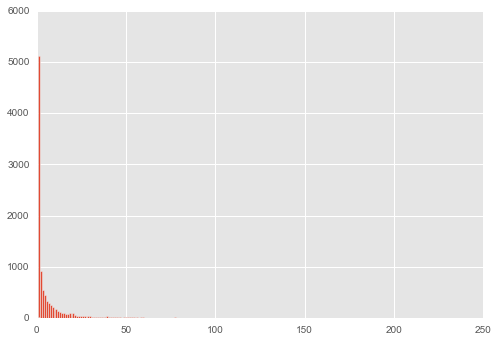

In [33]:
data['# of Orders'].hist(bins=200)

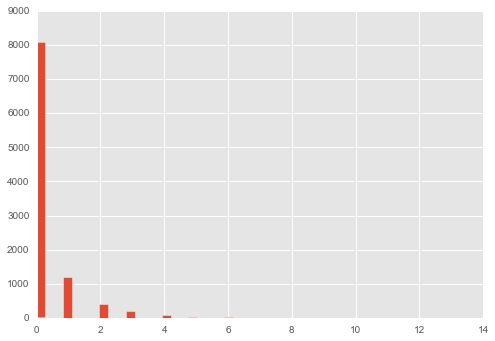

In [34]:
data['# of Orders in last 7 days'].hist(bins=50)

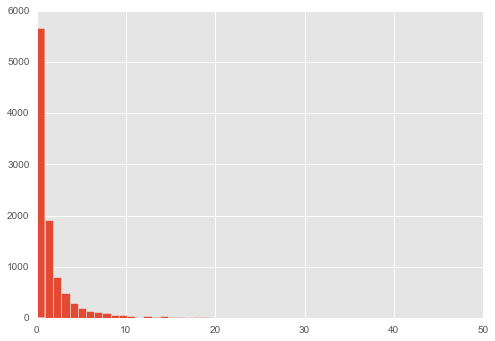

In [35]:
data['# of Orders in last 4 weeks'].hist(bins=50)

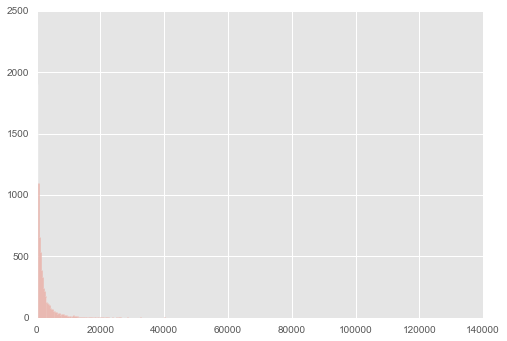

In [39]:
data['Amount'].hist(bins=500)

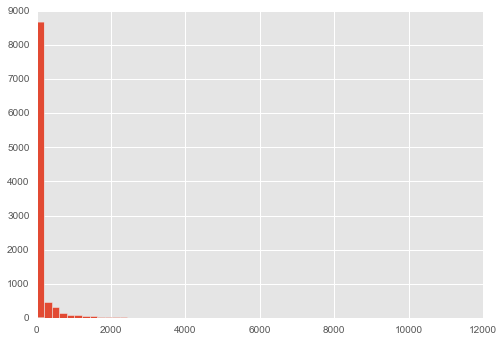

In [42]:
data['Amount in last 7 days'].hist(bins=50)

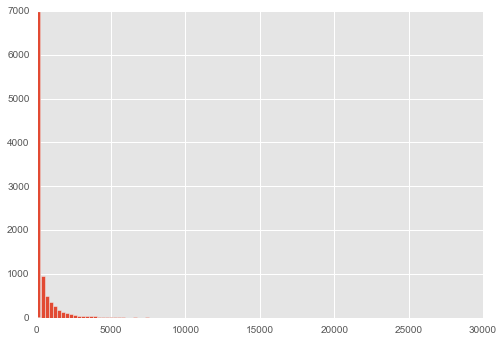

In [44]:
data['Amount in last 4 weeks'].hist(bins=100)

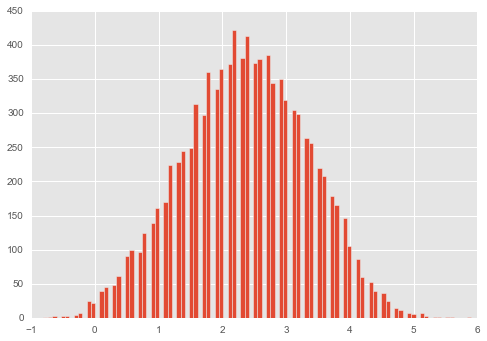

In [46]:
data['Avg_DistanceFromResturant'].hist(bins=100)

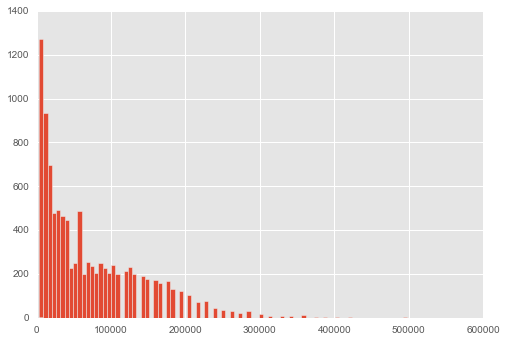

In [75]:
boxed = pd.DataFrame()
boxed['Avg_DeliveryTime'] = data['Avg_DeliveryTime']**3
boxed['Avg_DeliveryTime'].hist(bins=100)

In [76]:
import math
from scipy import stats

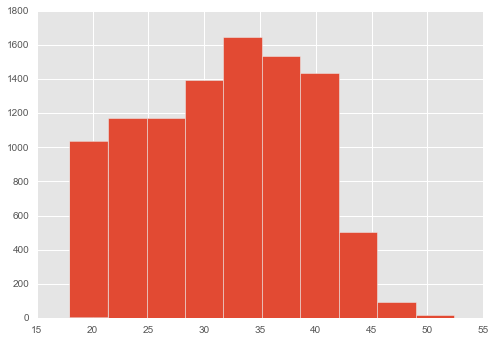

In [77]:
t1, _ = stats.boxcox(boxed['Avg_DeliveryTime'])
boxed['Amount in last 7 days']= t1
boxed['Amount in last 7 days'].hist()

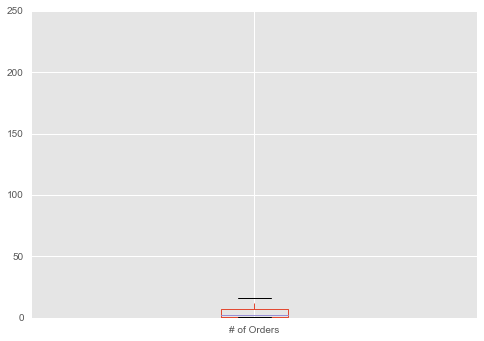

In [116]:
Analyze_Continuous_box(data, '# of Orders')

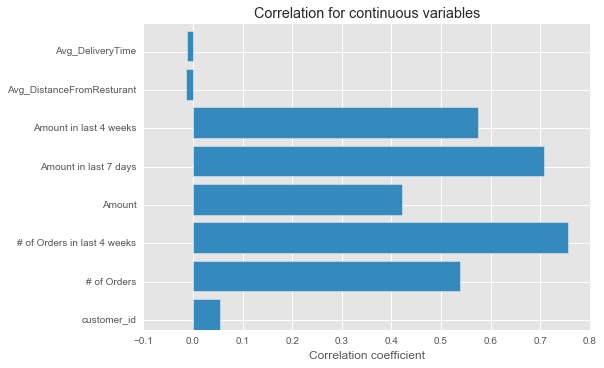

In [119]:
Analyze_correlation_continuous(data, '# of Orders in last 7 days')

In [15]:
_1, _2, _3 = Analyze_null_values(data)

customer_id                                     0
First Time                                      0
Recent Time                                     0
# of Orders                                     0
# of Orders in last 7 days                      0
# of Orders in last 4 weeks                     0
Amount                                          0
Amount in last 7 days                           0
Amount in last 4 weeks                          0
Avg_DistanceFromResturant                       0
Avg_DeliveryTime                                0
# of order before last week                     0
# of Orders in last 3 weeks before last week    0
# of Avg Orders in a week                       0
Amount in last 3 weeks before last week         0
Avg Amount in a week                            0
Amount before last week                         0
First_year                                      0
First_month                                     0
First_date                                      0


**Features to be used for baseline week's Clustering:**

In [20]:
Cols_to_use_week = ['# of order before last week',
                    '# of Avg Orders in a week',
                    'Amount before last week',
                    'Avg Amount in a week',
                    'Avg_DistanceFromResturant',
                    'Avg_DeliveryTime',
                    'First_year',
                    'First_month',
                    'First_date',
                    'First_hour',
                    'First_minute',
                   ] 


**Features to be used for targeted week:**

In [29]:
Cols_to_use_days = ['# of Orders',
                    '# of Orders in last 7 days',
                    'Amount',
                    'Amount in last 7 days',
                    'Avg_DistanceFromResturant',
                    'Avg_DeliveryTime',
                    'First_year',
                    'First_month',
                    'First_date',
                    'First_hour',
                    'First_minute',
                    ] 

**Kmeans Clustering**

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def K_means(X, cluster, init, max_iter):
    cls = KMeans(n_clusters=cluster, max_iter=max_iter, init=init)
    cls.fit(X)
    return cls

def reduce_dems(X_train):
    rpca=PCA(n_components=2, svd_solver='randomized')
    return rpca.fit_transform(X_train)

def plot(kmeans, reduced_data):
    h = 0.1
    x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
    y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure(1)
    pl.clf()

    pl.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    pl.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=20, linewidths=3,
               color='r', zorder=10)
    pl.title('K-means clustering on selected 20_newsgroup (religion group and technology) ')
    pl.xlim(x_min, x_max)
    pl.ylim(y_min, y_max)
    pl.xticks(())
    pl.yticks(())
    pl.show()


X_ = data[Cols_to_use_week]
scale = StandardScaler()
X = scale.fit_transform(X_)

In [22]:
K = range(1,50)
KM = [K_means(X, k ,'k-means++', 100) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]
# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
kIdx = 10

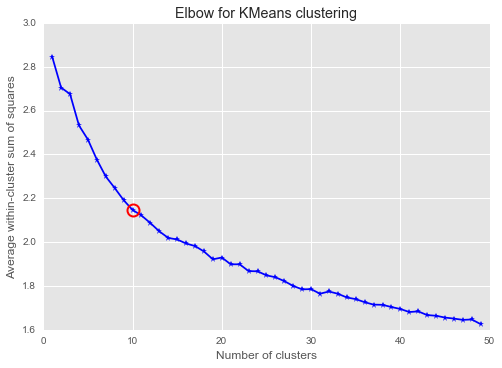

In [23]:
# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx-1], avgWithinSS[kIdx-1], marker='o', markersize=12, 
        markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

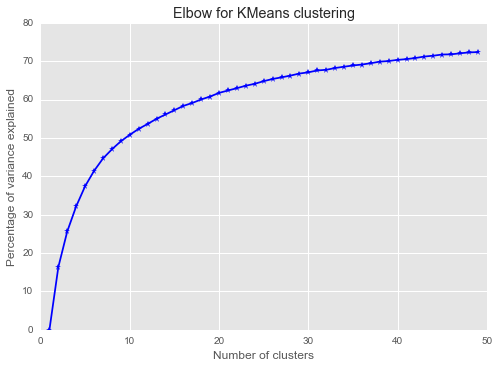

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.show()

**Baseline model for Weekly Analysis**

In [32]:
pred = KM[kIdx-1].labels_
result_df = data.copy()
result_df['pred_cluster_week'] = pred

**Analyzing the last week's data**

In [30]:
_X_ = data[Cols_to_use_days]
scale = StandardScaler()
X = scale.fit_transform(_X_)

In [31]:
KMW = K_means(X, 10, KM[kIdx-1].cluster_centers_, 100)

/Users/abhatna4/anaconda/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:889: RuntimeWarning:

Explicit initial center position passed: performing only one init in k-means instead of n_init=10



In [33]:
pred = KMW.labels_
result_df['pred_cluster_7days'] = pred

**Analyzing the behavior of the customers and detecting the ones who changed their course**

In [34]:
result_df["Behavior"] = result_df['pred_cluster_week'] - result_df['pred_cluster_7days']

In [35]:
result_df.to_csv("Result.csv", header=True, index=False)

The customers whose cluster is changed they will be considered as anomaly and can be used for further analysis. Below Analysis is for the anomalies.

In [36]:
test = result_df.loc[result_df['Behavior'] != 0]

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,...,First_hour,First_minute,Recent_year,Recent_month,Recent_date,Recent_hour,Recent_minute,pred_cluster_week,pred_cluster_7days,Behavior
9,1111111,2015-06-11 06:06:00,2015-11-21 02:45:00,158,1,28,15279,94,3336,2.1,...,6,6,2015,11,21,2,45,3,9,-6
21,1218634,2015-07-27 10:19:00,2016-01-06 21:25:00,105,3,3,34307,1263,1263,2.5,...,10,19,2016,1,6,21,25,9,3,6
31,266463,2015-06-14 06:30:00,2015-11-19 05:07:00,97,0,21,11429,0,2504,1.8,...,6,30,2015,11,19,5,7,3,9,-6
38,157410,2015-06-26 07:55:00,2015-12-04 03:58:00,90,1,15,36545,160,4973,1.7,...,7,55,2015,12,4,3,58,3,9,-6
40,6497,2015-06-13 00:57:00,2015-11-22 22:20:00,90,5,9,17304,904,1601,3.6,...,0,57,2015,11,22,22,20,9,3,6
42,44258,2015-06-28 21:15:00,2015-12-08 21:54:00,89,12,16,17048,2531,3286,2.0,...,21,15,2015,12,8,21,54,9,3,6
45,1268649,2015-07-23 11:19:00,2016-01-03 11:44:00,87,4,8,20011,1470,2947,2.3,...,11,19,2016,1,3,11,44,9,3,6
46,1306519,2015-06-21 17:26:00,2015-12-04 17:22:00,86,4,18,19335,846,3955,2.1,...,17,26,2015,12,4,17,22,3,9,-6
47,249380,2015-07-16 13:09:00,2015-12-26 21:04:00,86,4,26,17463,483,4554,1.2,...,13,9,2015,12,26,21,4,3,9,-6
49,1355445,2015-06-26 23:05:00,2015-12-06 22:59:00,84,4,6,46171,2613,4081,2.1,...,23,5,2015,12,6,22,59,9,3,6


Below Cells represent the customer who have churned interest in last week.

In [72]:
check = test.loc[test['# of Orders in last 7 days'] < test['# of Avg Orders in a week']]
check.shape[0]

292

Below Cells represent the customer who have increased interest in last week.

In [73]:
check1 = test.loc[test['# of Orders in last 7 days'] > test['# of Avg Orders in a week']]
check1.shape[0]

314

**Profit and Loss w.r.t. Anomalies and Revenue Churn Rate Analysis for Anomalies**

In [70]:
check['Lost_amt'] = check['Avg Amount in a week'] - check['Amount in last 7 days']
check1['Gained_amt'] = check1['Amount in last 7 days'] - check1['Avg Amount in a week']
revenue_churn_rate = np.mean(np.where(check['Avg Amount in a week'] < 1, check['Avg Amount in a week'], check['Lost_amt']/check['Avg Amount in a week']))

/Users/abhatna4/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/abhatna4/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [67]:
PnL = sum(check1['Gained_amt'])-sum(check['Lost_amt'])

In [69]:
"Total Profit/Loss is: ", PnL

('Total Profit/Loss is: ', 71285.999999999971)